mTSP-DS comparison vs mTSP

Imports:

In [1]:
from MTSP_DS_MILP_Solver import MTSP_DS_MILP_Solver
from TourUtils import plotTours
from core.Location import rand_location
import numpy as np

Parameters:
n: number of customer
m: number of drone stations
Dn: number of drones for each drone station
Kn: number of trucks

In [2]:
n = 8
m = 2 
Dn = 2
Kn = 2

num_of_setups = 20

Random setups:

In [3]:
def randomLocations(num_of_locations):
    locs = []
    for _ in range(num_of_locations):
        locs.append(rand_location())
    return locs

In [4]:
customer_setups = []
ds_setups = []
for _ in range(num_of_setups):
    customer_setups.append(randomLocations(n))
    ds_setups.append(randomLocations(m))

[(101,127), (81,97), (80,73), (66,109), (149,137), (112,111), (41,20), (40,145)]
[(11,139), (130,121)]
[(123,58), (17,134), (68,143), (113,21), (141,24), (95,36), (50,8), (55,1)]
[(84,53), (146,142)]
[(76,80), (96,71), (73,58), (53,100), (4,4), (84,4), (93,31), (62,6)]
[(121,68), (12,63)]
[(10,45), (70,32), (103,54), (3,21), (50,62), (67,6), (116,39), (22,130)]
[(49,130), (64,31)]
[(148,141), (58,63), (24,62), (82,130), (147,128), (44,62), (35,49), (119,134)]
[(57,97), (105,98)]
[(141,77), (57,13), (50,147), (121,114), (106,21), (72,77), (73,19), (145,112)]
[(55,84), (141,32)]
[(118,71), (135,119), (80,145), (139,13), (39,53), (79,119), (129,9), (105,2)]
[(93,92), (7,55)]
[(76,117), (1,37), (46,77), (147,90), (48,88), (10,56), (85,113), (59,51)]
[(37,68), (112,146)]
[(20,117), (120,69), (84,86), (96,60), (138,40), (132,44), (64,29), (86,117)]
[(72,3), (92,130)]
[(9,107), (5,133), (73,146), (137,48), (40,81), (11,76), (14,80), (88,126)]
[(139,123), (104,78)]
[(117,68), (85,107), (104,10

Evaluate improvements method:

In [5]:
def calculate_average_percentage_improvement(list_A, list_B):
    
    if len(list_A) != len(list_B):
        raise ValueError("Both lists must have the same length")
    
    percentage_improvements = [
        ((a - b) / a) * 100 for a, b in zip(list_A, list_B)
    ]
    average_percentage_improvement = np.mean(percentage_improvements)
    return average_percentage_improvement

Models comparison: 


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-05


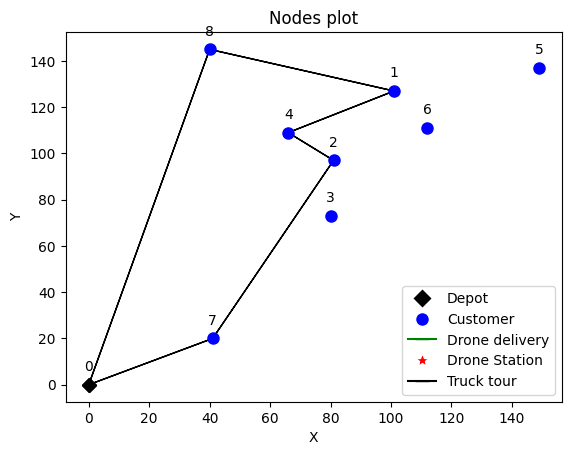

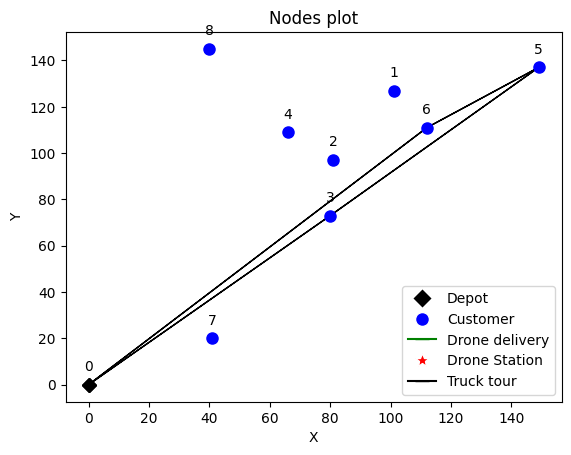

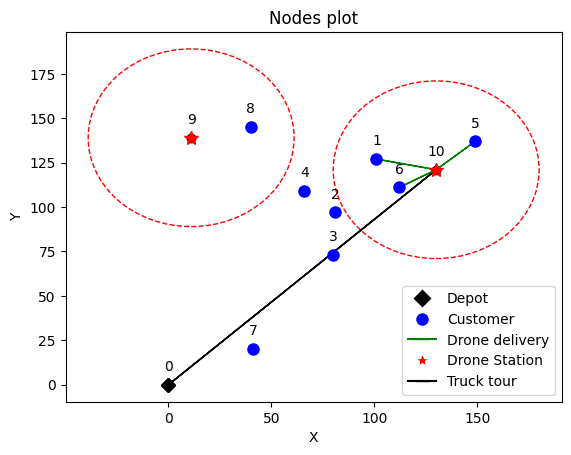

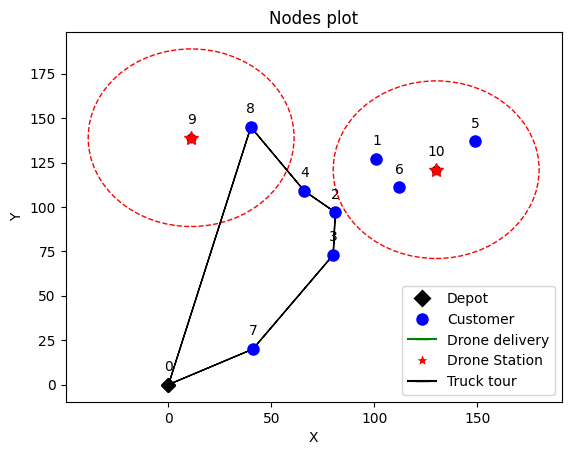

MILP: 405.32021754104596, DS: 355.1957206949431


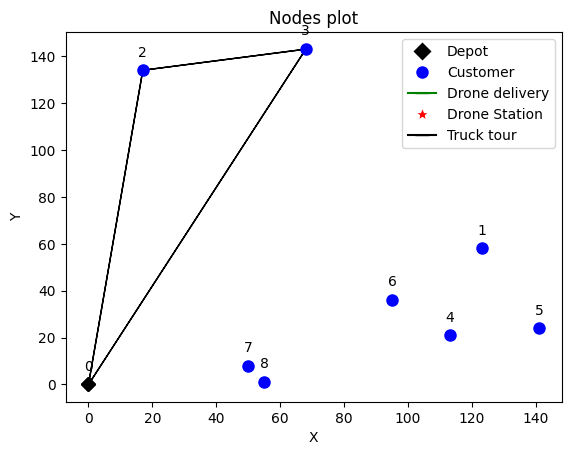

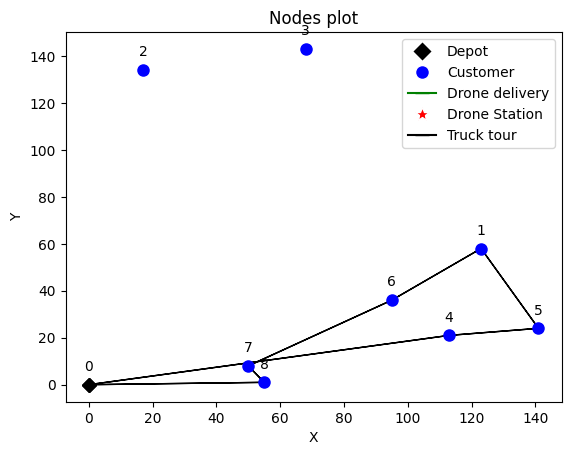

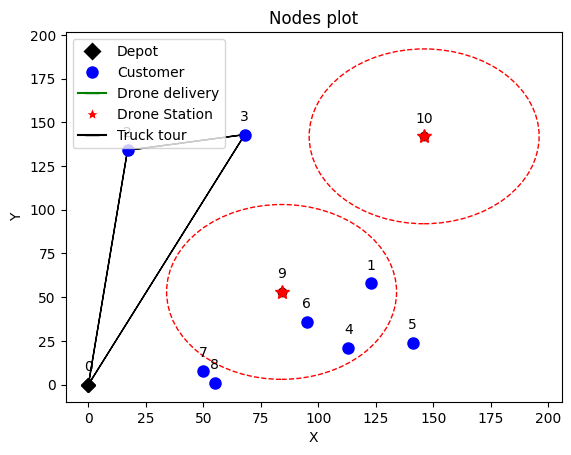

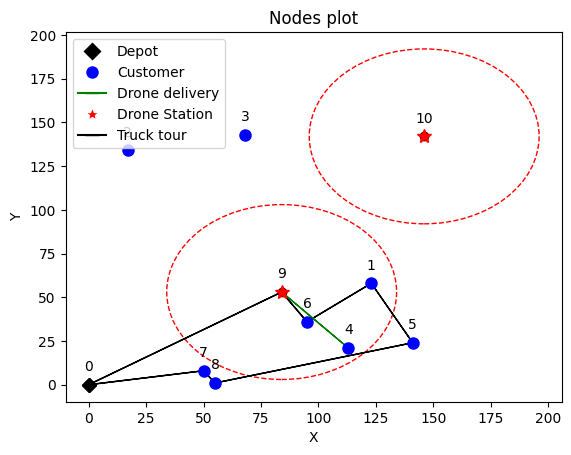

MILP: 345.20664427343, DS: 345.20664427342984


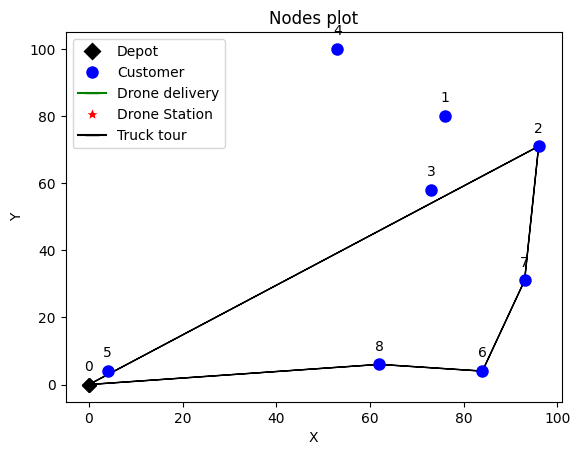

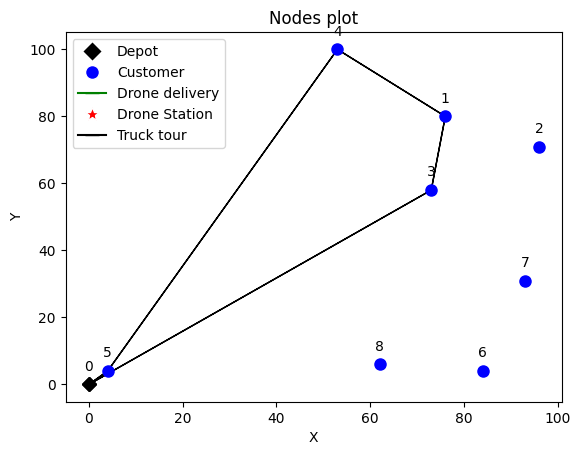

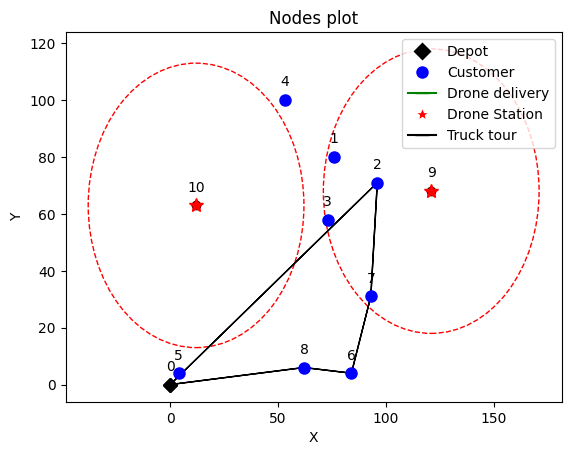

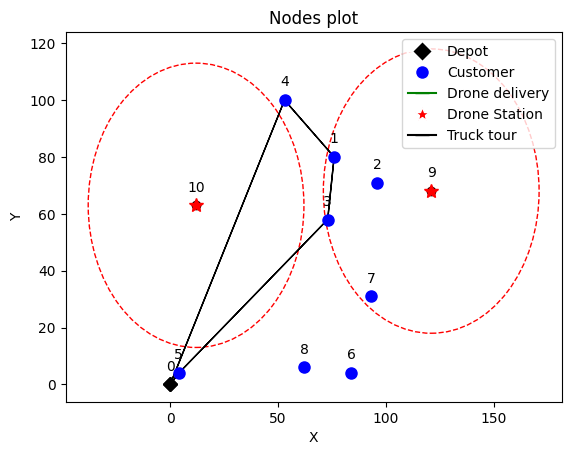

MILP: 272.3558892626666, DS: 272.35588926266666


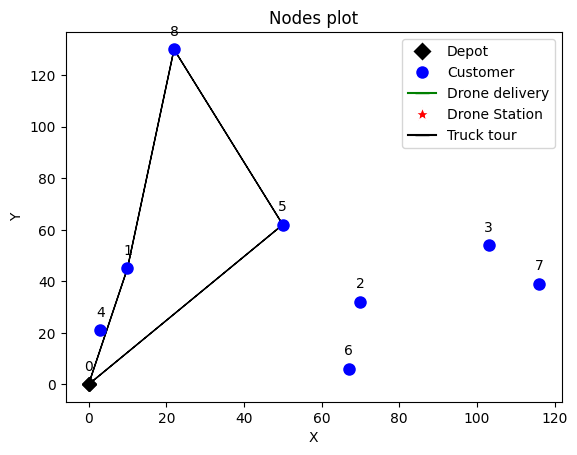

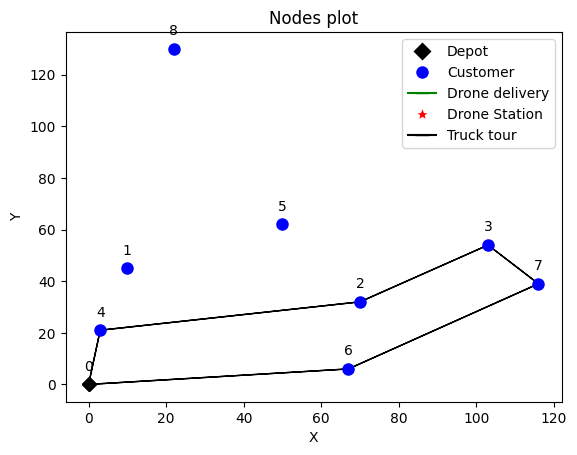

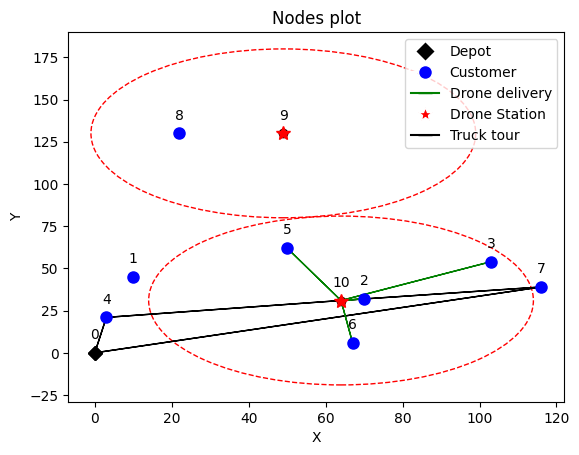

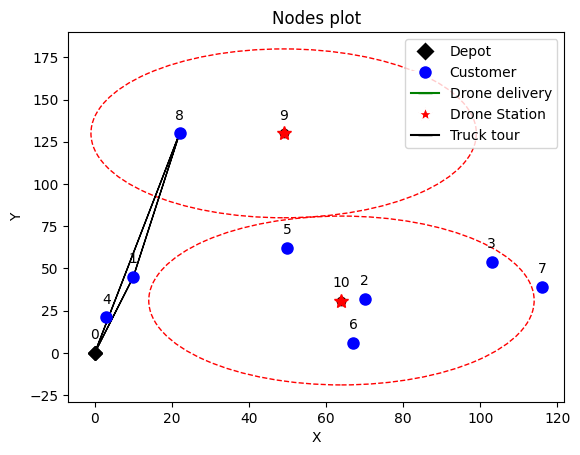

MILP: 285.1289382648489, DS: 263.78899980528456


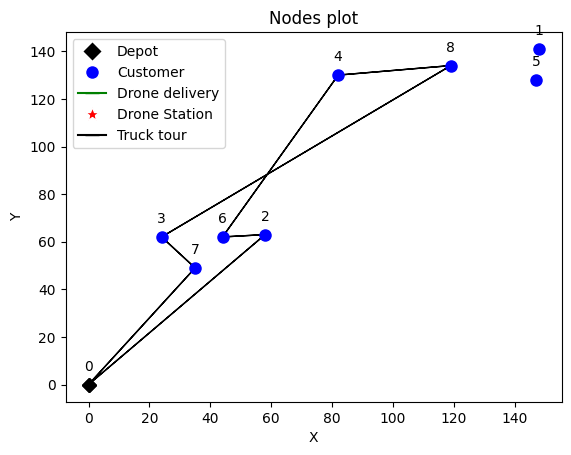

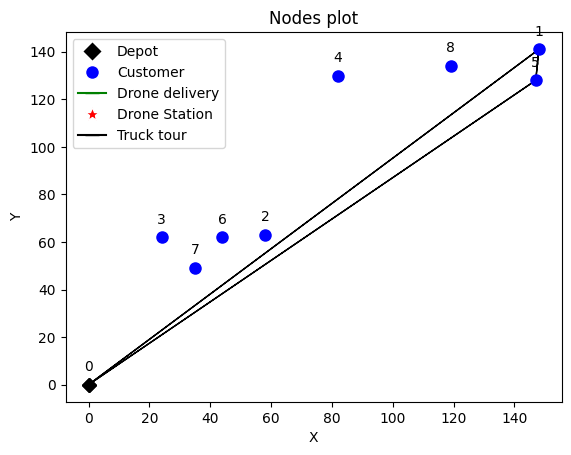

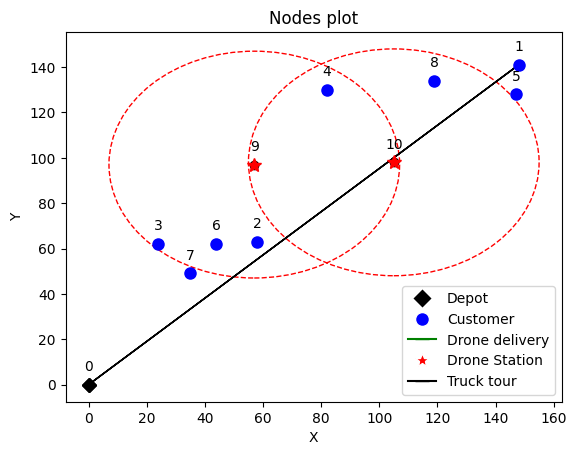

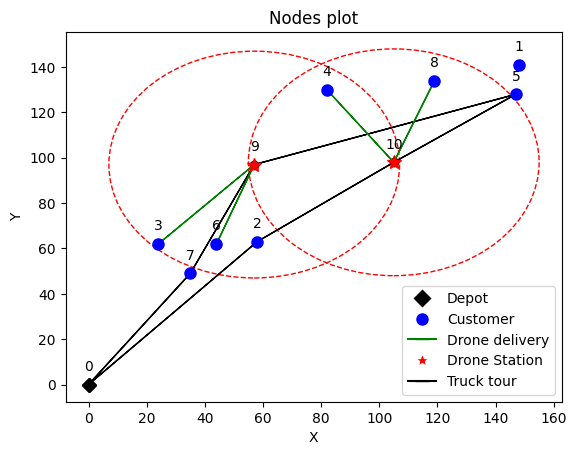

MILP: 412.37013227040245, DS: 408.8275920238262


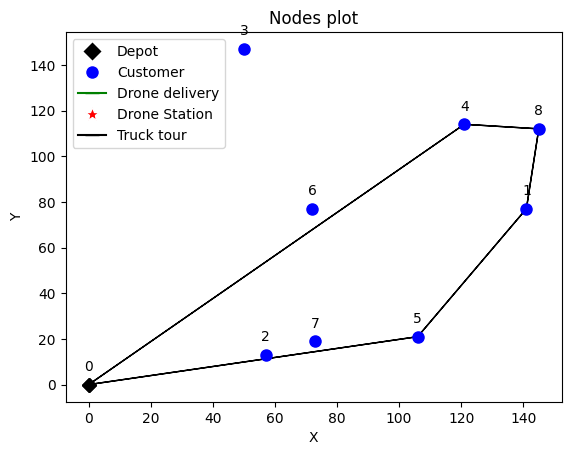

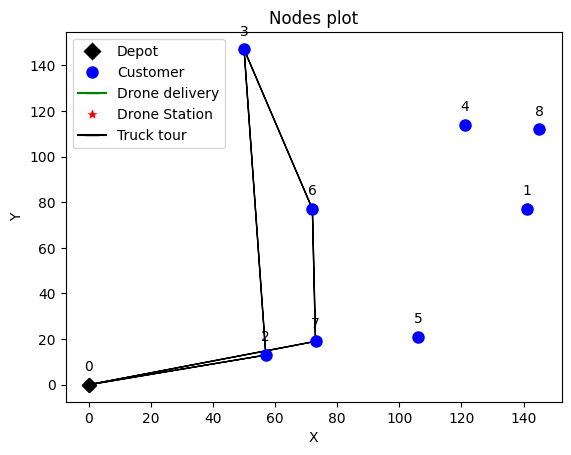

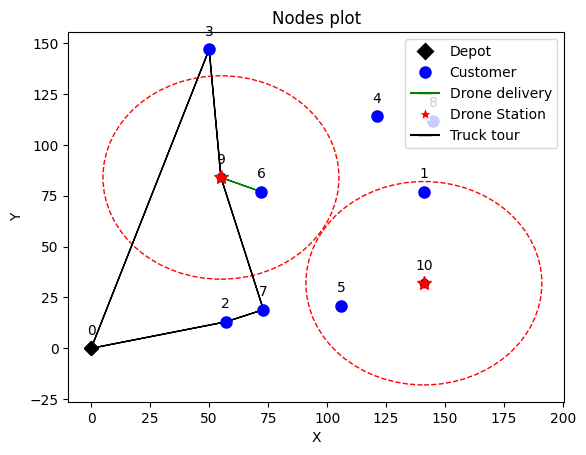

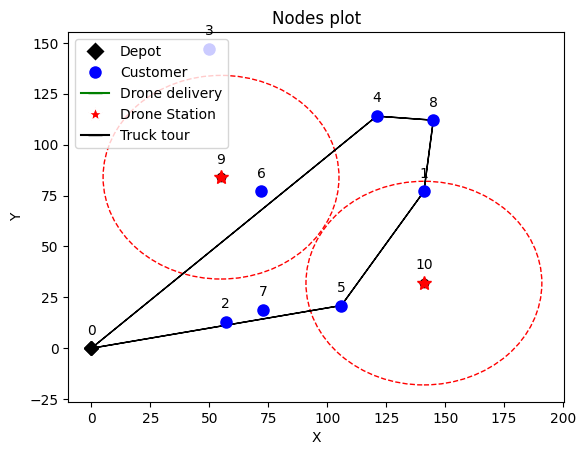

MILP: 399.65285229117137, DS: 399.6528522911714


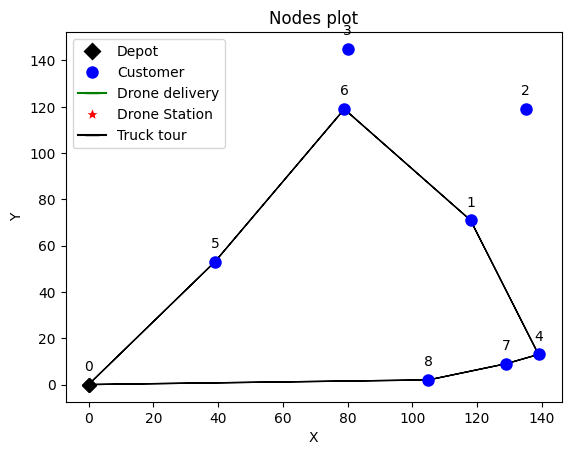

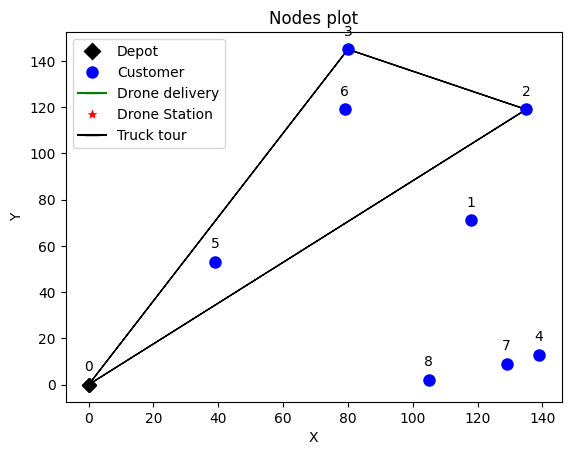

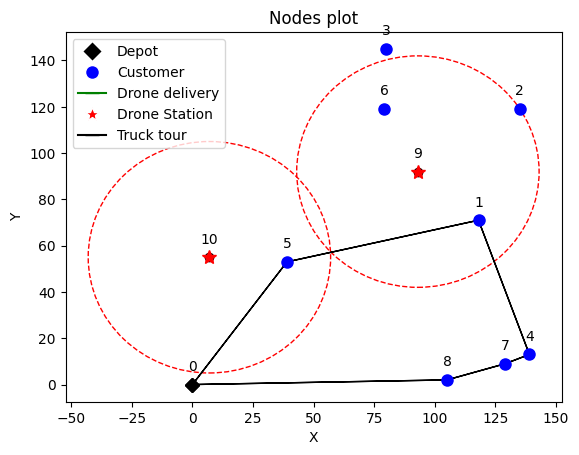

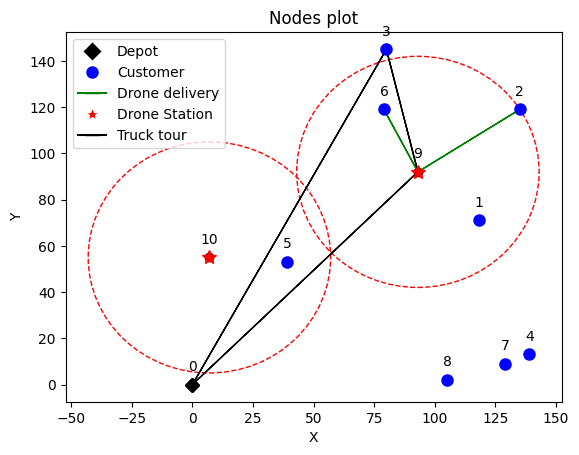

MILP: 407.29850297513156, DS: 350.9926718203212


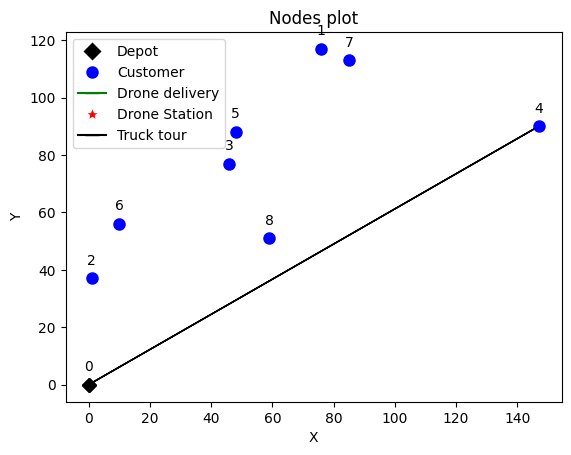

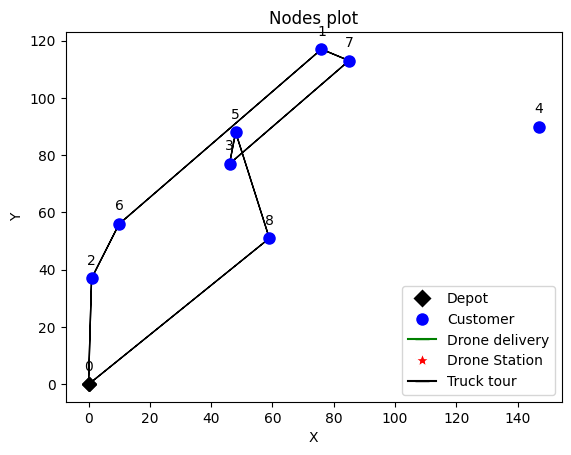

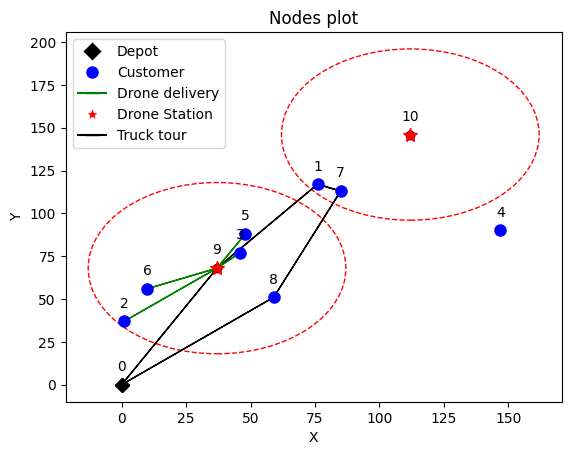

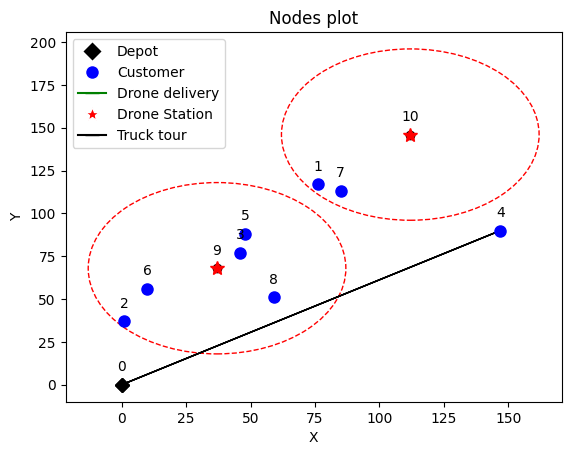

MILP: 344.7259781333574, DS: 344.7259781333574


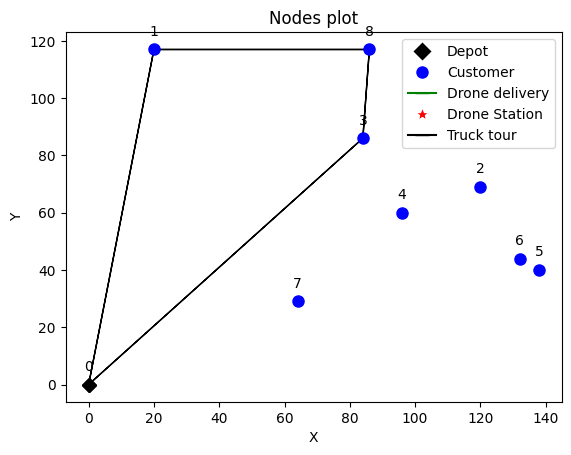

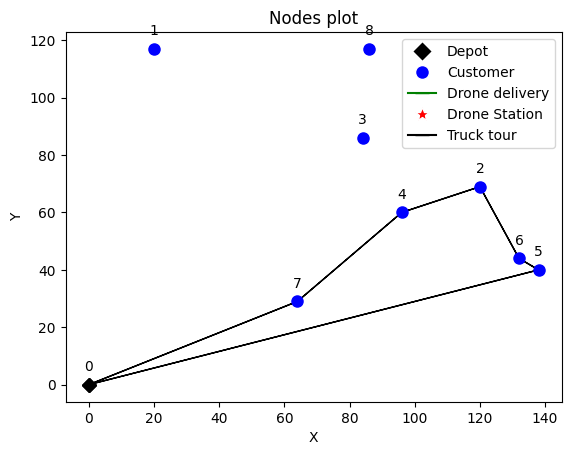

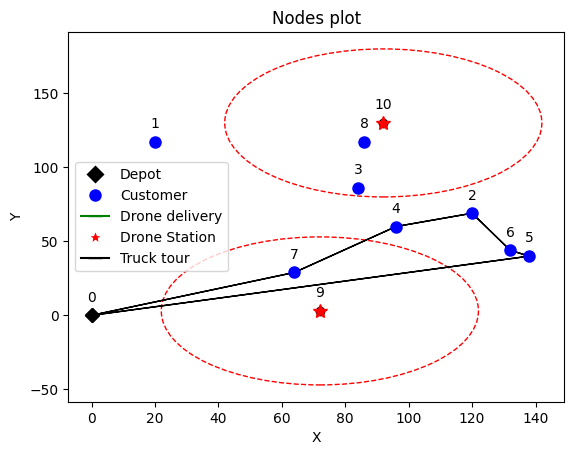

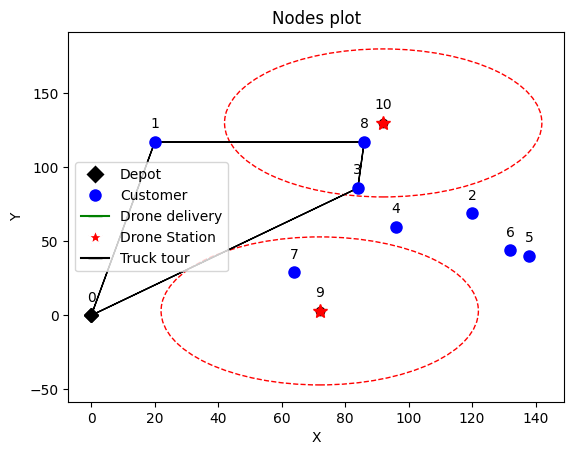

MILP: 335.9780140286806, DS: 335.978014028681


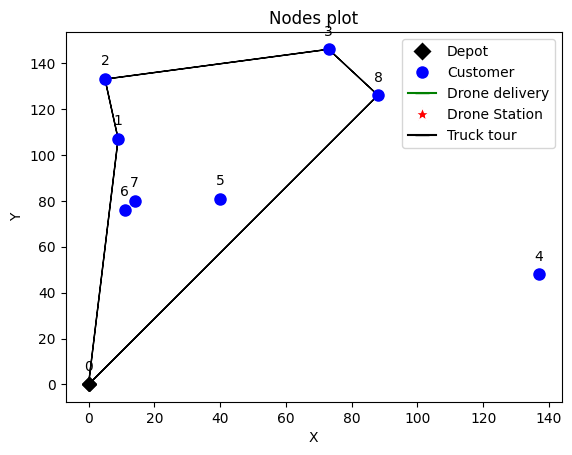

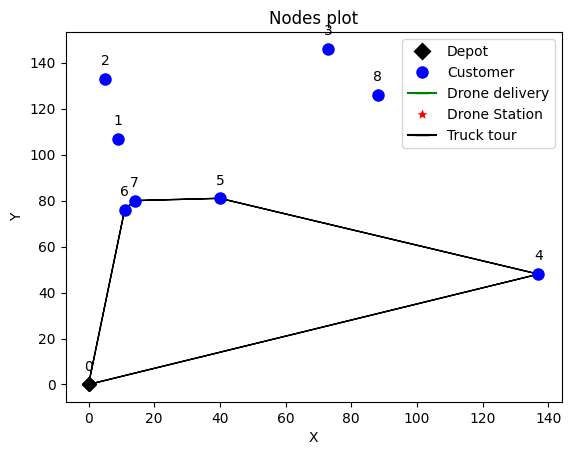

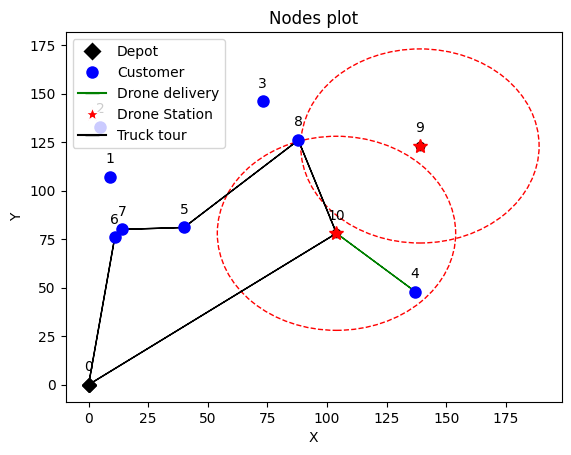

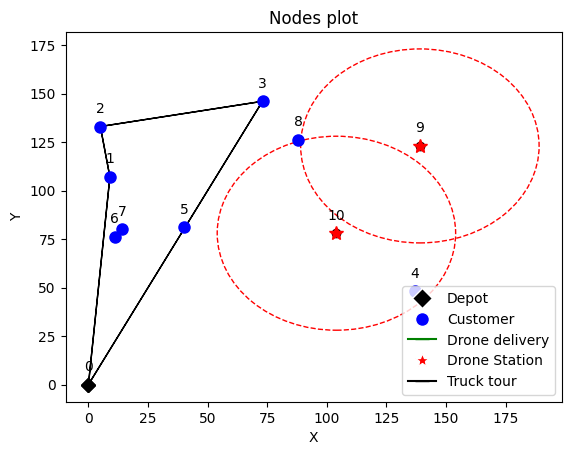

MILP: 381.60322179048967, DS: 366.1481885204693


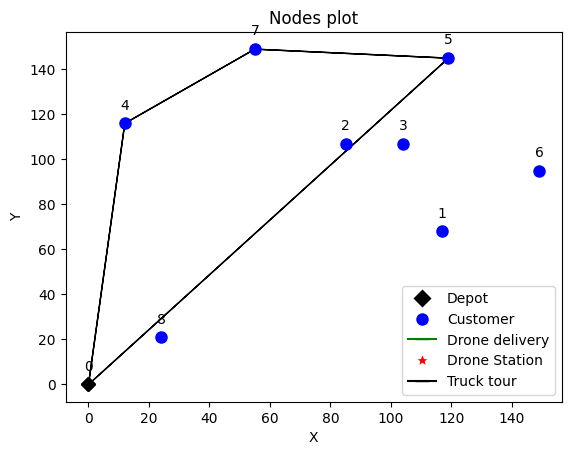

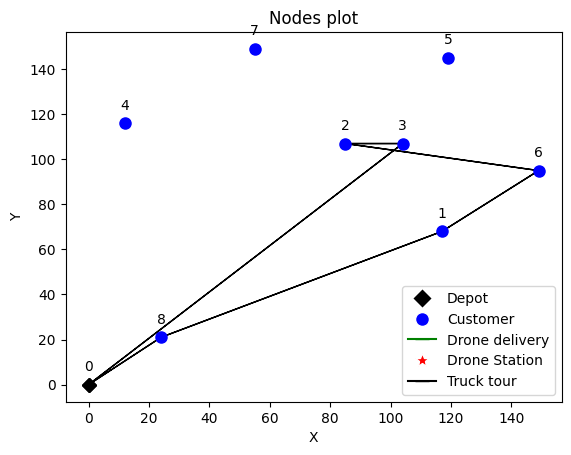

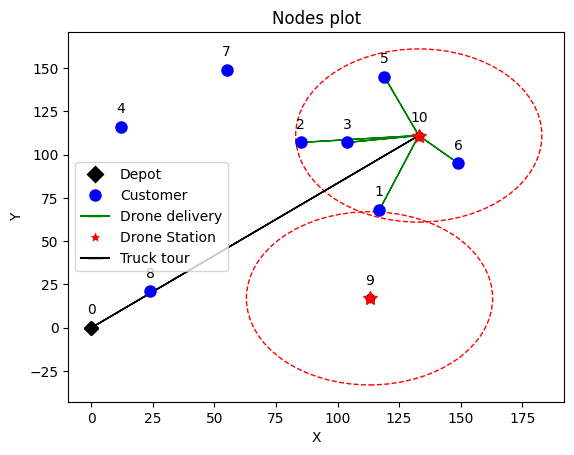

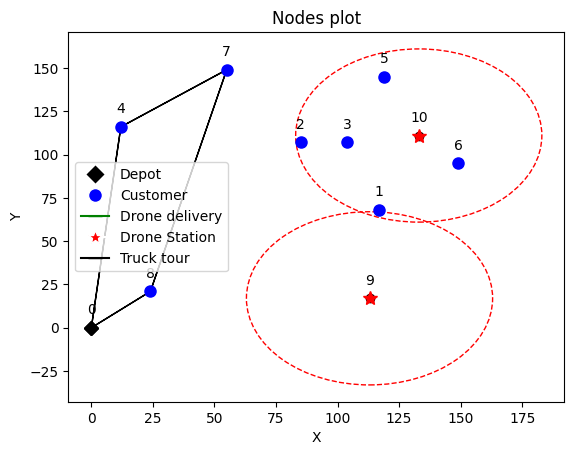

MILP: 422.5265535529257, DS: 346.4678917302439


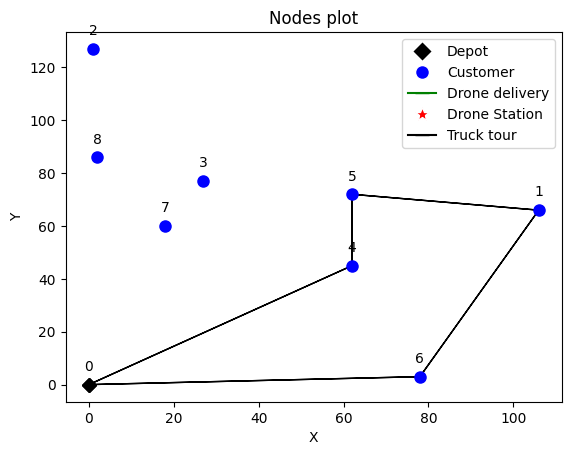

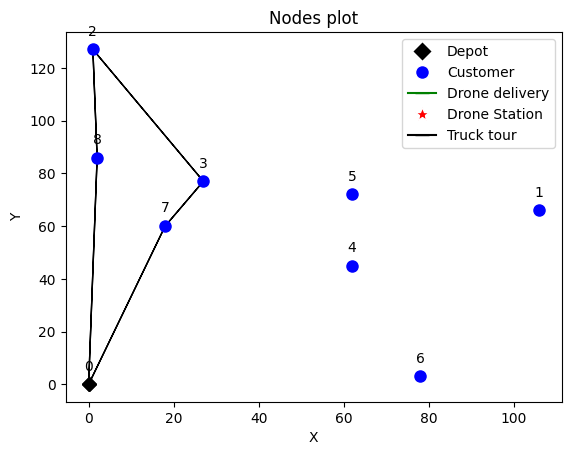

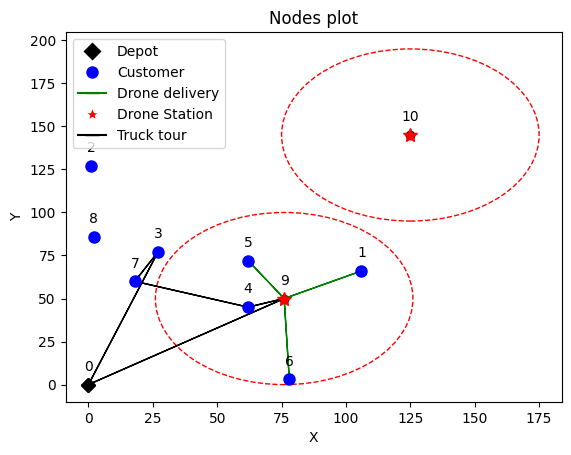

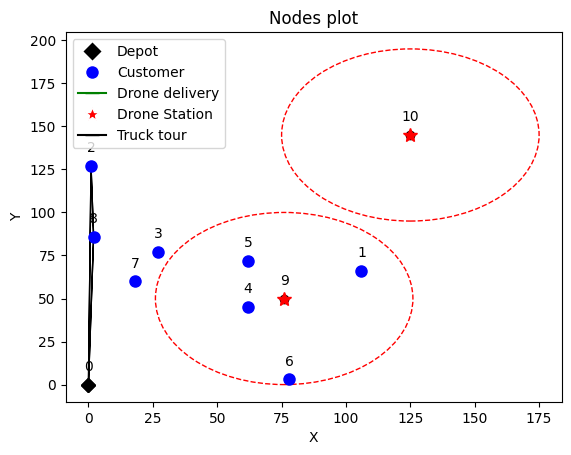

MILP: 295.0162811236471, DS: 254.0393829260982


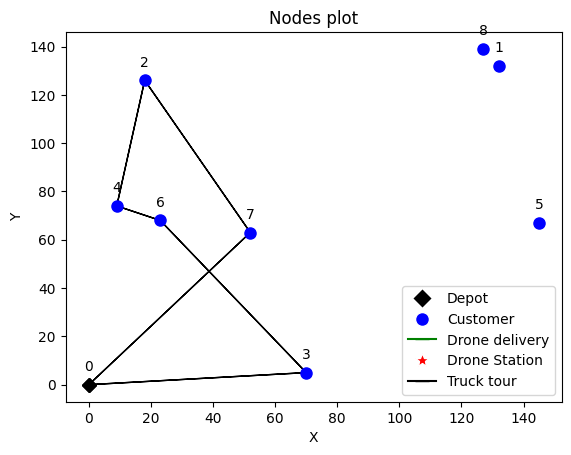

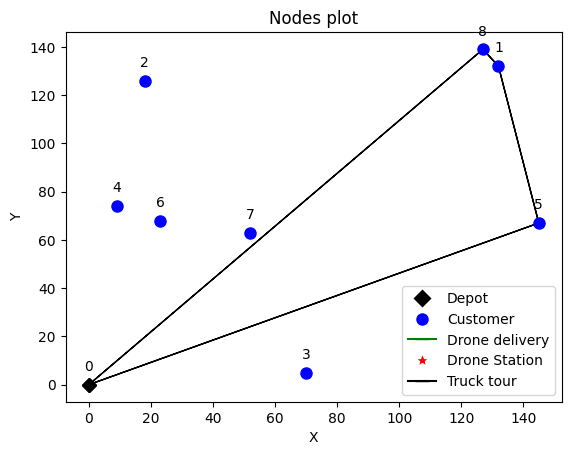

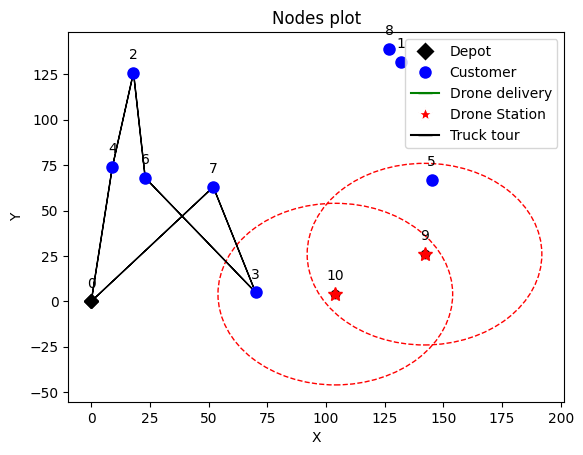

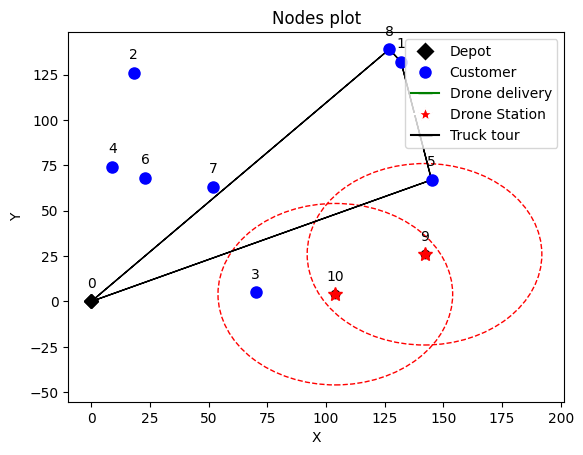

MILP: 422.9023066934515, DS: 422.9023066934515


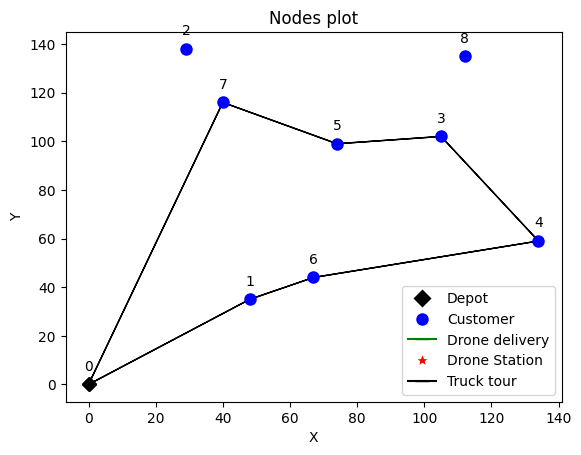

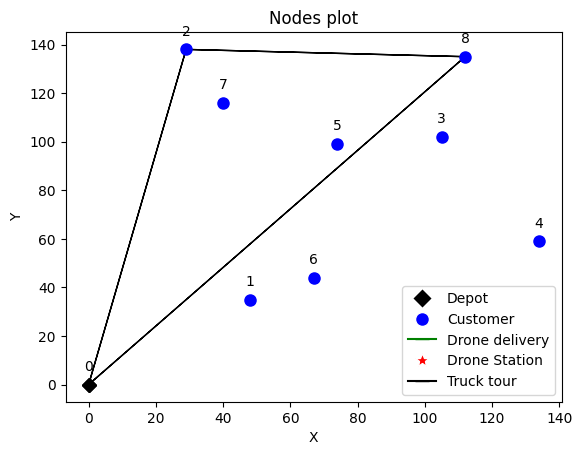

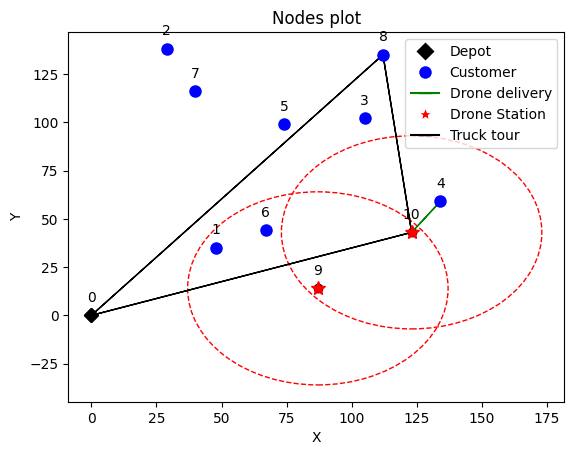

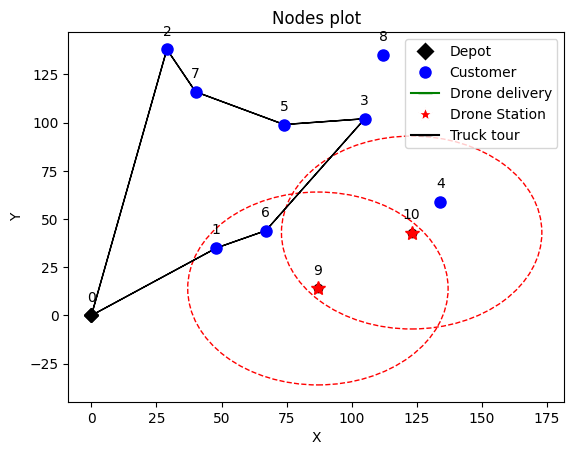

MILP: 399.47932892181234, DS: 398.36587574858254


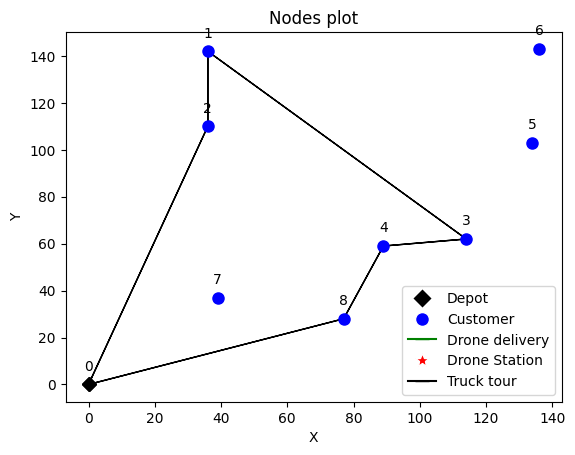

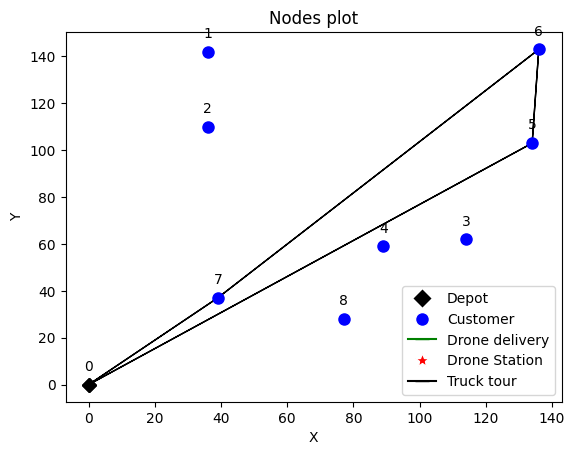

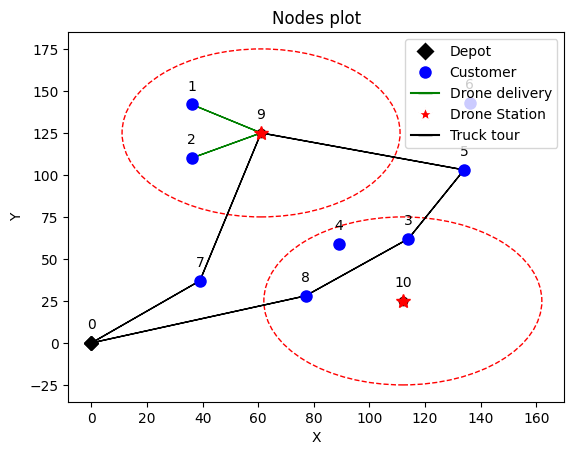

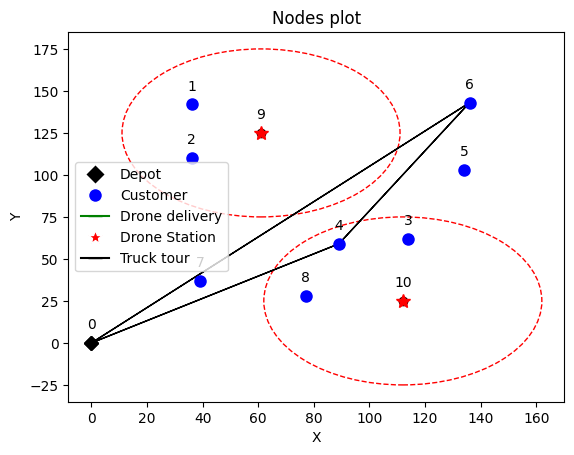

MILP: 406.5042032708221, DS: 400.37989376290136


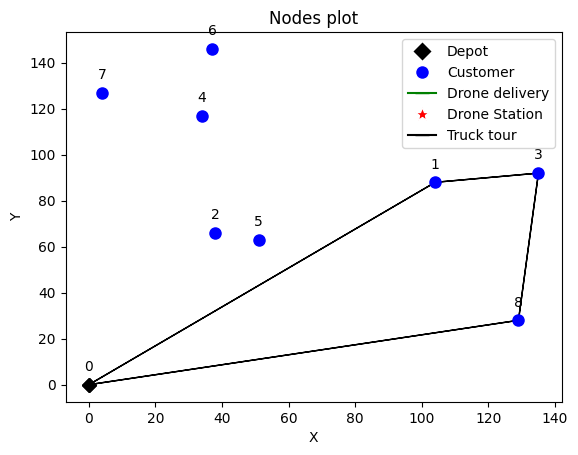

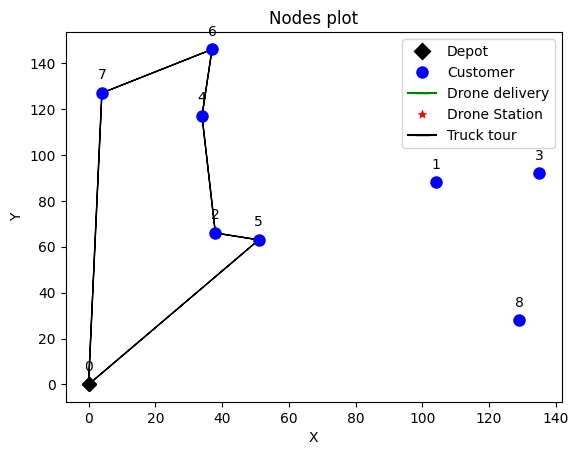

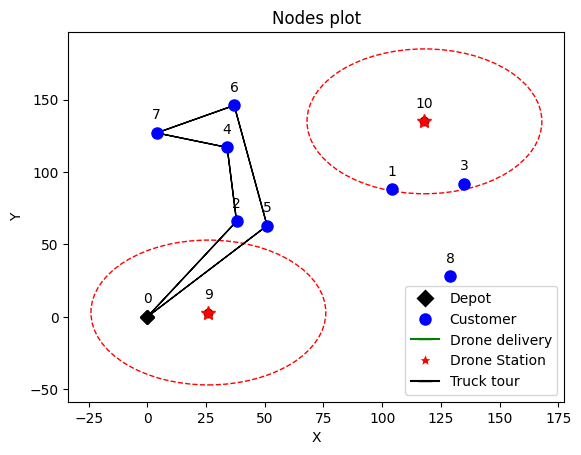

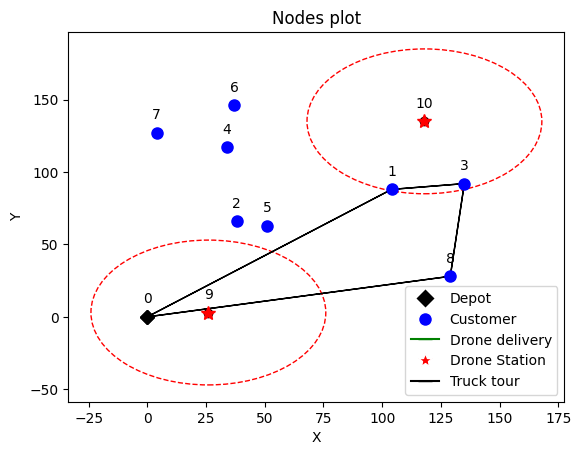

MILP: 363.77651268798047, DS: 363.77651268798047


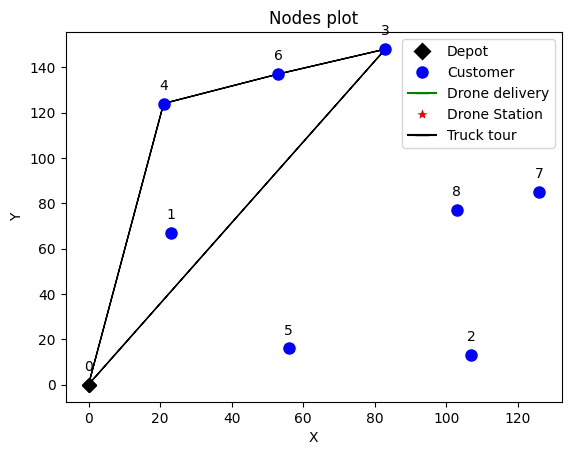

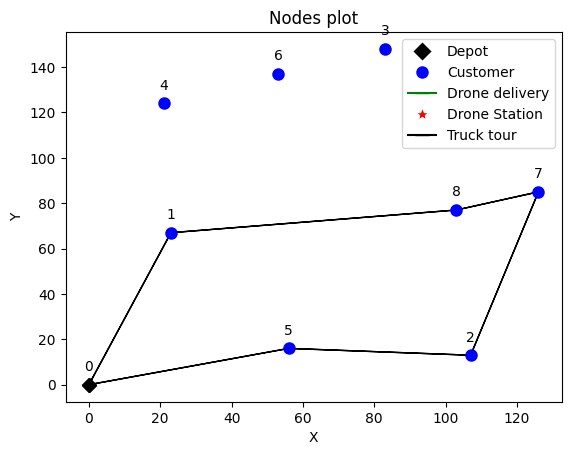

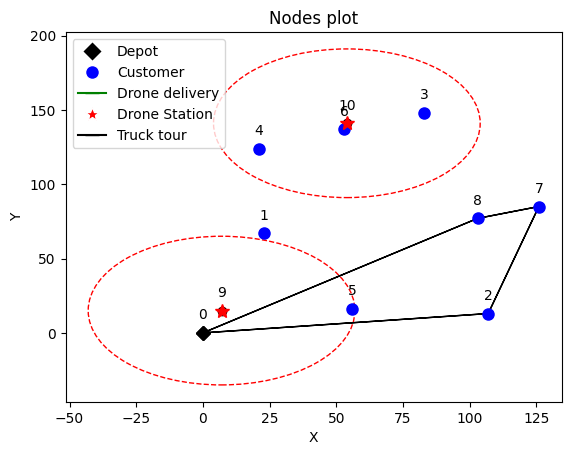

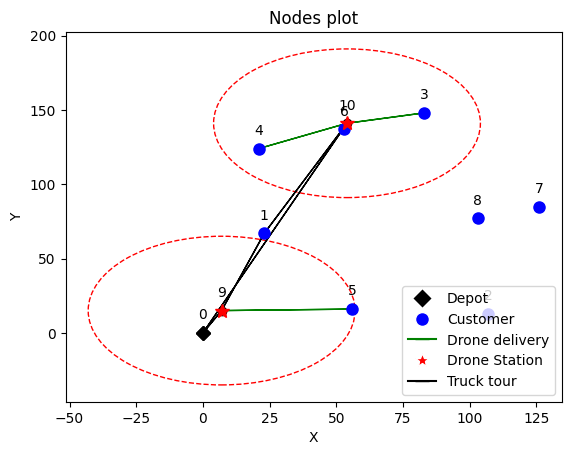

MILP: 361.94358006846306, DS: 335.203330262552


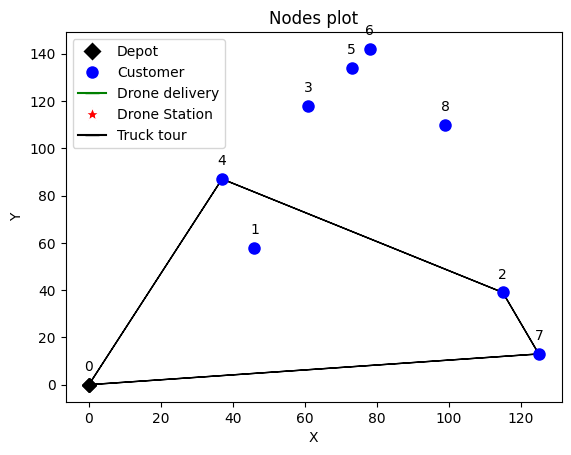

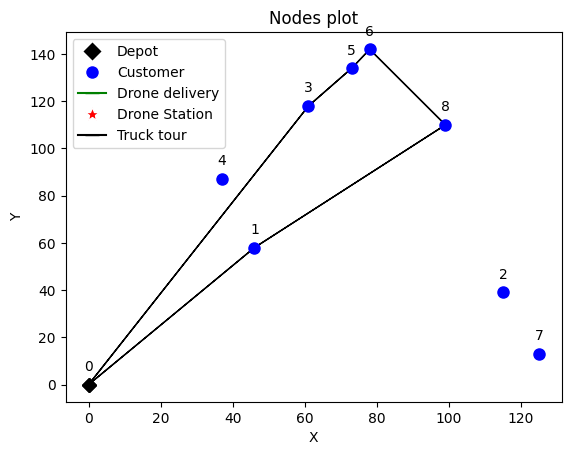

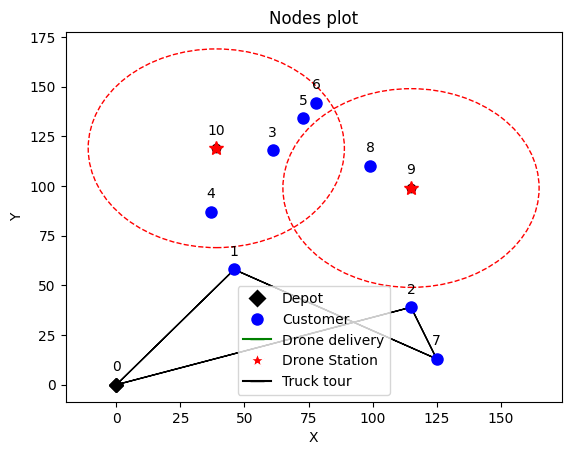

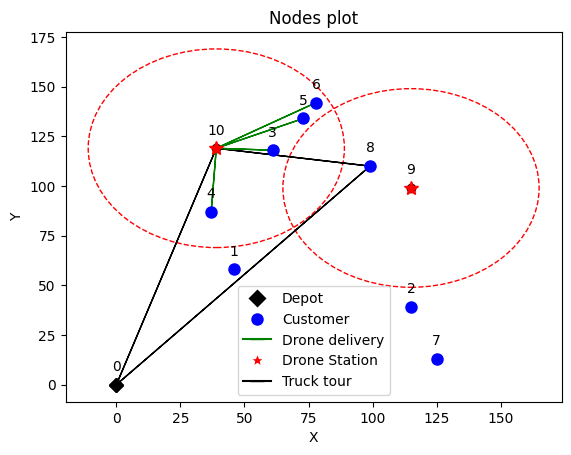

MILP: 348.8203842414755, DS: 333.88890220869354


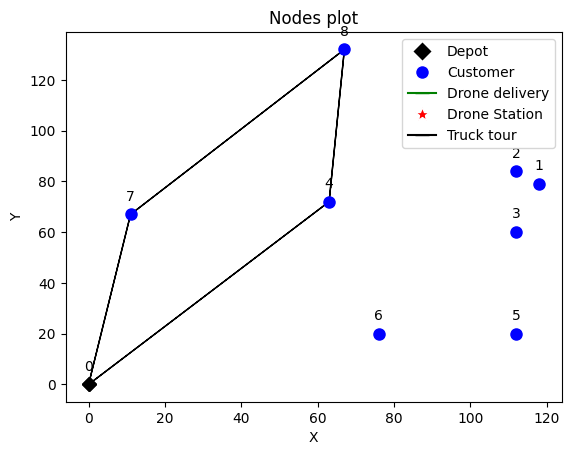

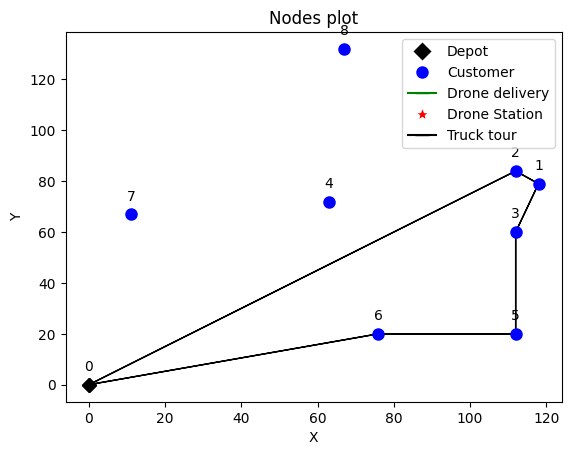

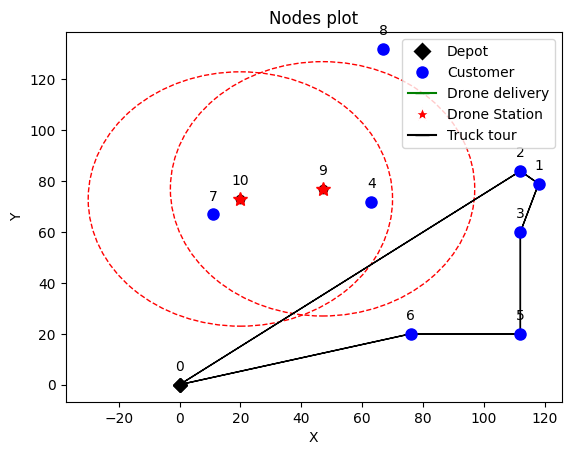

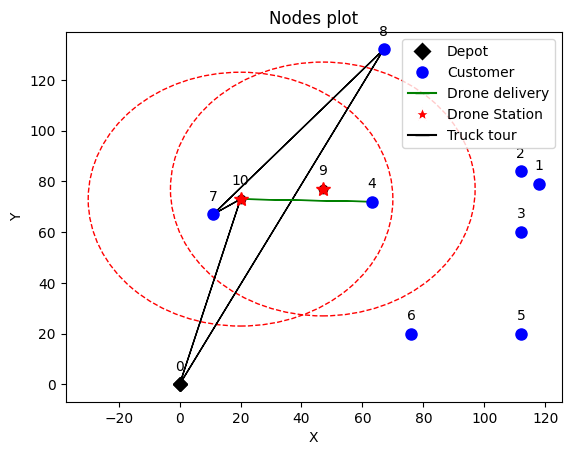

MILP: 322.3226393386316, DS: 322.3226393386319


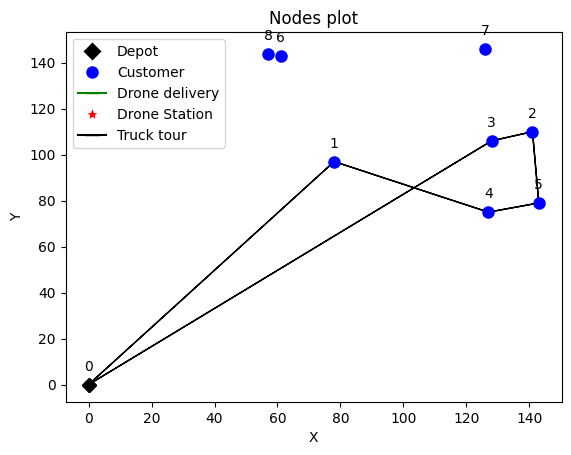

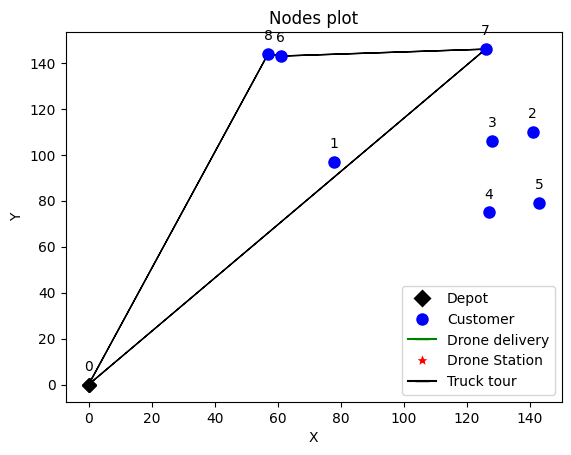

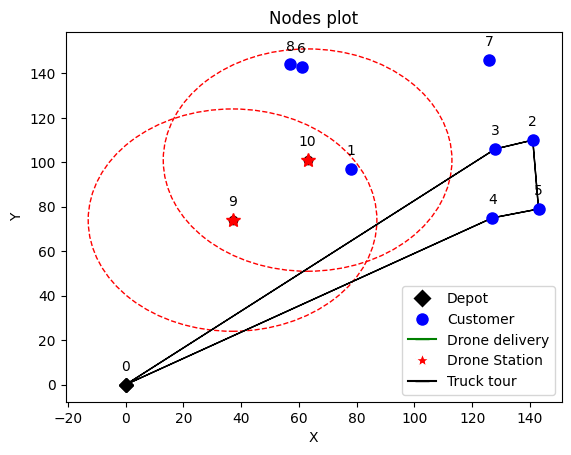

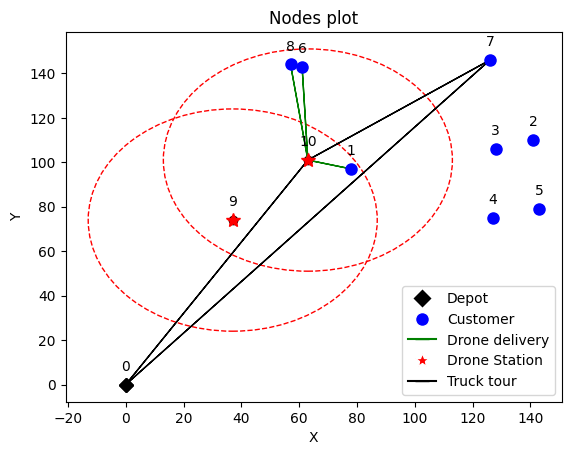

MILP: 416.9154886261338, DS: 389.31101159385025
[405.32021754104596, 345.20664427343, 272.3558892626666, 285.1289382648489, 412.37013227040245, 399.65285229117137, 407.29850297513156, 344.7259781333574, 335.9780140286806, 381.60322179048967, 422.5265535529257, 295.0162811236471, 422.9023066934515, 399.47932892181234, 406.5042032708221, 363.77651268798047, 361.94358006846306, 348.8203842414755, 322.3226393386316, 416.9154886261338]
[355.1957206949431, 345.20664427342984, 272.35588926266666, 263.78899980528456, 408.8275920238262, 399.6528522911714, 350.9926718203212, 344.7259781333574, 335.978014028681, 366.1481885204693, 346.4678917302439, 254.0393829260982, 422.9023066934515, 398.36587574858254, 400.37989376290136, 363.77651268798047, 335.203330262552, 333.88890220869354, 322.3226393386319, 389.31101159385025]
4.527492166781302


In [6]:
mtsp_solutions = []
mtsp_ds_solutions = []
for setup in range(num_of_setups):
    mtsp_solver = MTSP_DS_MILP_Solver(n, 0, 0, Kn, custom_locations=customer_setups[setup])
    all_locations = []
    all_locations.extend(customer_setups[setup])
    all_locations.extend(ds_setups[setup])
    mtsp_ds_solver = MTSP_DS_MILP_Solver(n, m, Dn, Kn, custom_locations=all_locations)
    
    mtsp_solver.solve()
    plotTours(mtsp_solver.getModel(), mtsp_solver.v, mtsp_solver.eps)
    mtsp_ds_solver.solve()
    plotTours(mtsp_ds_solver.getModel(), mtsp_ds_solver.v, mtsp_ds_solver.eps)
    
    mtsp_solutions.append(mtsp_solver.getSolution())
    mtsp_ds_solutions.append(mtsp_ds_solver.getSolution())
    print(f"MILP: {mtsp_solver.getSolution()}, DS: {mtsp_ds_solver.getSolution()}")

print("Average percentage improvement: ", calculate_average_percentage_improvement(mtsp_solutions, mtsp_ds_solutions))